In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200307]#, 200314, 200321, 200328, 200404, 200411, 200418, 200425, 200502, 200502, 200509, 200516, 200523, 200530, 200606, 200613, 200620, 200627]
turnstiles_df = get_data(week_nums)

In [5]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [6]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
#turnstiles_df = turnstiles_df.reset_index(drop=True)

In [7]:
turnstiles_df.index

RangeIndex(start=0, stop=207883, step=1)

In [8]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058


In [9]:
turnstiles_df.columns
turnstiles_df.STATION.unique()
mask = (turnstiles_df["STATION"] == 'BEDFORD AV')
turnstiles_df = turnstiles_df[mask]

In [10]:
turnstiles_df.head()
turnstiles_df.tail()
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 33017 to 33436
Data columns (total 11 columns):
C/A         420 non-null object
UNIT        420 non-null object
SCP         420 non-null object
STATION     420 non-null object
LINENAME    420 non-null object
DIVISION    420 non-null object
DATE        420 non-null object
TIME        420 non-null object
DESC        420 non-null object
ENTRIES     420 non-null int64
EXITS       420 non-null int64
dtypes: int64(2), object(9)
memory usage: 39.4+ KB


In [11]:
turnstiles_df.DATE.value_counts().sort_index()

02/29/2020    60
03/01/2020    60
03/02/2020    60
03/03/2020    60
03/04/2020    60
03/05/2020    60
03/06/2020    60
Name: DATE, dtype: int64

In [12]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df["DATE"]+ " " +turnstiles_df["TIME"],
                                          format="%m/%d/%Y %H:%M:%S")

In [15]:
turnstiles_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
33017,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,03:00:00,REGULAR,264526,45659,2020-02-29 03:00:00
33018,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,07:00:00,REGULAR,264543,45666,2020-02-29 07:00:00
33019,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,11:00:00,REGULAR,264624,45687,2020-02-29 11:00:00
33020,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,15:00:00,REGULAR,264861,45726,2020-02-29 15:00:00
33021,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,19:00:00,REGULAR,265157,45773,2020-02-29 19:00:00
33022,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,23:00:00,REGULAR,265302,45804,2020-02-29 23:00:00
33023,H009,R235,00-00-00,BEDFORD AV,L,BMT,03/01/2020,03:00:00,REGULAR,265366,45824,2020-03-01 03:00:00
33024,H009,R235,00-00-00,BEDFORD AV,L,BMT,03/01/2020,07:00:00,REGULAR,265377,45828,2020-03-01 07:00:00
33025,H009,R235,00-00-00,BEDFORD AV,L,BMT,03/01/2020,11:00:00,REGULAR,265430,45845,2020-03-01 11:00:00
33026,H009,R235,00-00-00,BEDFORD AV,L,BMT,03/01/2020,15:00:00,REGULAR,265595,45871,2020-03-01 15:00:00


In [16]:
(turnstiles_df
 .groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,H009,R235,00-00-00,BEDFORD AV,2020-02-29 03:00:00,1
263,H009,R235,00-06-00,BEDFORD AV,2020-03-01 23:00:00,1
287,H009,R235,00-06-00,BEDFORD AV,2020-03-05 23:00:00,1
286,H009,R235,00-06-00,BEDFORD AV,2020-03-05 19:00:00,1
285,H009,R235,00-06-00,BEDFORD AV,2020-03-05 15:00:00,1
...,...,...,...,...,...,...
136,H009,R235,00-03-02,BEDFORD AV,2020-03-01 19:00:00,1
135,H009,R235,00-03-02,BEDFORD AV,2020-03-01 15:00:00,1
134,H009,R235,00-03-02,BEDFORD AV,2020-03-01 11:00:00,1
133,H009,R235,00-03-02,BEDFORD AV,2020-03-01 07:00:00,1


In [17]:
turnstiles_df.DESC.unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [18]:
turnstiles_df = turnstiles_df.drop(["EXITS","DESC"], axis=1)
turnstiles_df.head(10)
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'DATE_TIME'],
      dtype='object')

In [19]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
33017,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,03:00:00,264526,2020-02-29 03:00:00
33018,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,07:00:00,264543,2020-02-29 07:00:00
33019,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,11:00:00,264624,2020-02-29 11:00:00
33020,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,15:00:00,264861,2020-02-29 15:00:00
33021,H009,R235,00-00-00,BEDFORD AV,L,BMT,02/29/2020,19:00:00,265157,2020-02-29 19:00:00


In [20]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],
                         inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [21]:
(turnstiles_df
 .groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,H009,R235,00-00-00,BEDFORD AV,2020-02-29 03:00:00,1
263,H009,R235,00-06-00,BEDFORD AV,2020-03-01 23:00:00,1
287,H009,R235,00-06-00,BEDFORD AV,2020-03-05 23:00:00,1
286,H009,R235,00-06-00,BEDFORD AV,2020-03-05 19:00:00,1
285,H009,R235,00-06-00,BEDFORD AV,2020-03-05 15:00:00,1


In [22]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
33436,H009,R235,00-06-03,BEDFORD AV,L,BMT,03/06/2020,23:00:00,411077,2020-03-06 23:00:00
33435,H009,R235,00-06-03,BEDFORD AV,L,BMT,03/06/2020,19:00:00,410944,2020-03-06 19:00:00
33434,H009,R235,00-06-03,BEDFORD AV,L,BMT,03/06/2020,15:00:00,410585,2020-03-06 15:00:00
33433,H009,R235,00-06-03,BEDFORD AV,L,BMT,03/06/2020,11:00:00,410259,2020-03-06 11:00:00
33432,H009,R235,00-06-03,BEDFORD AV,L,BMT,03/06/2020,07:00:00,409505,2020-03-06 07:00:00


In [23]:
turnstiles_daily = (turnstiles_df
                       .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"], as_index=False)
                       .ENTRIES.first())

In [24]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,H009,R235,00-00-00,BEDFORD AV,02/29/2020,265302
1,H009,R235,00-00-00,BEDFORD AV,03/01/2020,265920
2,H009,R235,00-00-00,BEDFORD AV,03/02/2020,267756
3,H009,R235,00-00-00,BEDFORD AV,03/03/2020,269464
4,H009,R235,00-00-00,BEDFORD AV,03/04/2020,270912


In [25]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE","ENTRIES"]].apply(lambda x: x.shift(1))

In [26]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,H009,R235,00-00-00,BEDFORD AV,02/29/2020,265302,NaN,NaN
1,H009,R235,00-00-00,BEDFORD AV,03/01/2020,265920,02/29/2020,265302.0
2,H009,R235,00-00-00,BEDFORD AV,03/02/2020,267756,03/01/2020,265920.0
3,H009,R235,00-00-00,BEDFORD AV,03/03/2020,269464,03/02/2020,267756.0
4,H009,R235,00-00-00,BEDFORD AV,03/04/2020,270912,03/03/2020,269464.0


In [27]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
65,H009,R235,00-06-03,BEDFORD AV,03/02/2020,404309,03/01/2020,402606.0
66,H009,R235,00-06-03,BEDFORD AV,03/03/2020,406270,03/02/2020,404309.0
67,H009,R235,00-06-03,BEDFORD AV,03/04/2020,407722,03/03/2020,406270.0
68,H009,R235,00-06-03,BEDFORD AV,03/05/2020,409471,03/04/2020,407722.0
69,H009,R235,00-06-03,BEDFORD AV,03/06/2020,411077,03/05/2020,409471.0


In [28]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [29]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,H009,R235,00-00-00,BEDFORD AV,03/01/2020,265920,02/29/2020,265302.0
2,H009,R235,00-00-00,BEDFORD AV,03/02/2020,267756,03/01/2020,265920.0
3,H009,R235,00-00-00,BEDFORD AV,03/03/2020,269464,03/02/2020,267756.0
4,H009,R235,00-00-00,BEDFORD AV,03/04/2020,270912,03/03/2020,269464.0
5,H009,R235,00-00-00,BEDFORD AV,03/05/2020,272607,03/04/2020,270912.0


In [30]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES


In [31]:
mask = ((turnstiles_df["C/A"] == "H009") &
(turnstiles_df["UNIT"] == "R235") &
(turnstiles_df["SCP"] == "00-03-01") &
(turnstiles_df["STATION"] == "BEDFORD AV") &
(turnstiles_df["DATE"] == "03/21/2020"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME


In [32]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

Series([], dtype: int64)

In [33]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return np.nan
    return counter


In [34]:
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [35]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return np.nan
    return counter

In [36]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [37]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,H009,R235,00-00-00,BEDFORD AV,03/01/2020,265920,02/29/2020,265302.0,618.0
2,H009,R235,00-00-00,BEDFORD AV,03/02/2020,267756,03/01/2020,265920.0,1836.0
3,H009,R235,00-00-00,BEDFORD AV,03/03/2020,269464,03/02/2020,267756.0,1708.0
4,H009,R235,00-00-00,BEDFORD AV,03/04/2020,270912,03/03/2020,269464.0,1448.0
5,H009,R235,00-00-00,BEDFORD AV,03/05/2020,272607,03/04/2020,270912.0,1695.0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

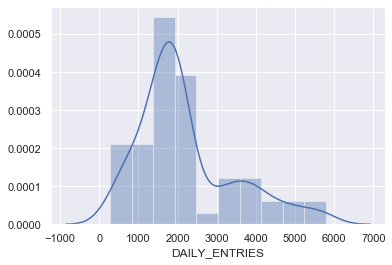

In [39]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000])

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
#plt.plot(turnstiles_daily["DATE"], (turnstiles_daily["ENTRIES"] - turnstiles_daily["PREV_ENTRIES"])

In [42]:
turnstiles_daily["entry_diff"] = (abs((turnstiles_daily["ENTRIES"] 
            - turnstiles_daily["PREV_ENTRIES"])))

In [43]:
turnstiles_daily_station = (turnstiles_daily
                            .groupby(["C/A", "UNIT", "STATION", "DATE"])[["DAILY_ENTRIES"]]
                            .sum()
                            .reset_index())
turnstiles_daily_station

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,H009,R235,BEDFORD AV,03/01/2020,12105.0
1,H009,R235,BEDFORD AV,03/02/2020,23691.0
2,H009,R235,BEDFORD AV,03/03/2020,23847.0
3,H009,R235,BEDFORD AV,03/04/2020,22558.0
4,H009,R235,BEDFORD AV,03/05/2020,25429.0
5,H009,R235,BEDFORD AV,03/06/2020,23769.0


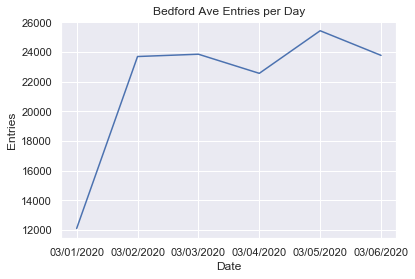

<Figure size 1440x1440 with 0 Axes>

In [44]:
plt.plot(turnstiles_daily_station["DATE"], turnstiles_daily_station["DAILY_ENTRIES"])
plt.title("Bedford Ave Entries per Day")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.figure(figsize = [20,20])
plt.savefig('bedford_ave_entries_per_day_0301_0626_2020.png')